# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import plotly.express as px
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
#confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
import joblib
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [ ]:
column_names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'martial_status', 'occupation', 'relationship',
             'race', 'gender', 'capital_gain', 'capital_loss', 'hours_per_week', 'country', 'income']

In [ ]:
data=pd.read_csv('adult.csv',names=column_names)

# Previewing Data

In [ ]:
for col in column_names:
  print(col + " : \n" + str(data[col].value_counts()))
  print("---------------------------------------------")

age : 
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
---------------------------------------------
workclass : 
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
---------------------------------------------
fnlwgt : 
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: fnlwgt, Length: 21648, dtype: int64
---------------------------------------------
education : 
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-sc

In [ ]:
data.head()

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   martial_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Data Preprocessing

In [ ]:
data.duplicated().sum()


24

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
martial_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
income            0
dtype: int64

# Data Visualization

In [ ]:
sex_percent=data['gender'].value_counts(normalize=True) * 100
print(sex_percent)

 Male      66.92381
 Female    33.07619
Name: gender, dtype: float64


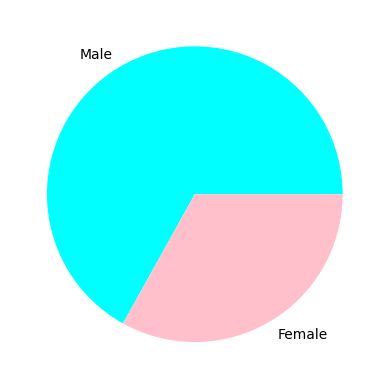

In [ ]:
plt.pie(data['gender'].value_counts(), labels = ['Male',"Female"], colors=['cyan', 'pink'])
plt.show()

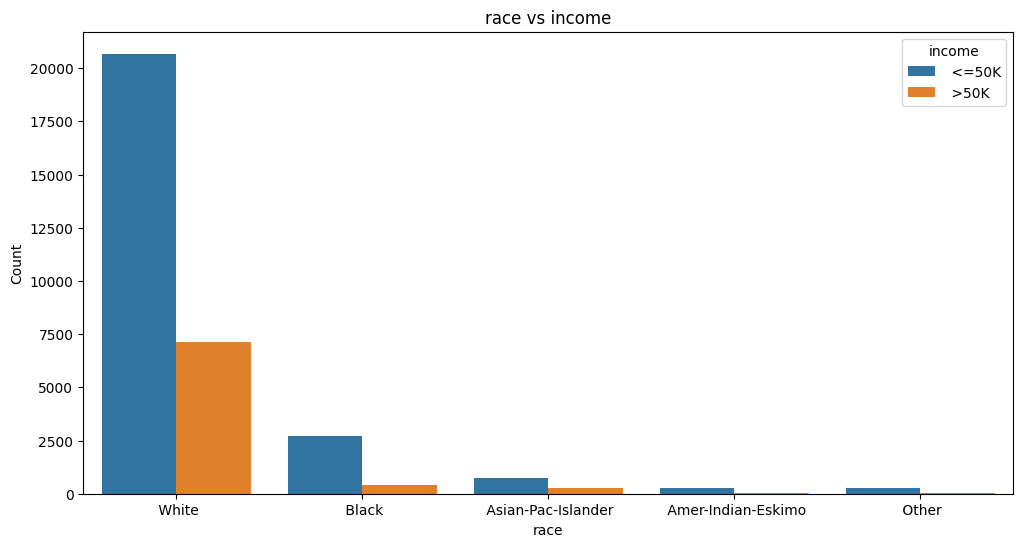

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.countplot(x='race', hue='income', data=data)
plt.title('race vs income')
plt.xlabel('race')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='gender', ylabel='count'>

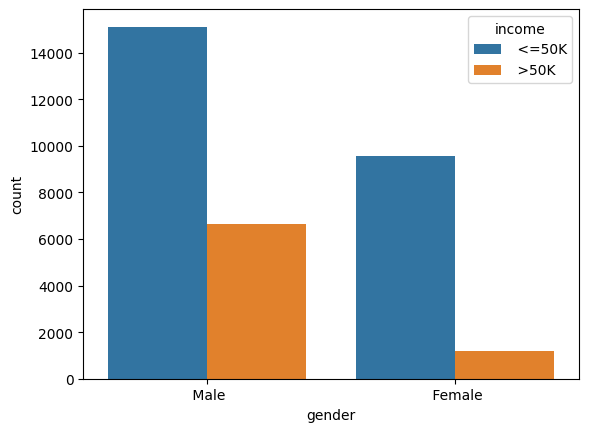

In [ ]:
sns.countplot(x="gender", hue="income", data=data)

In [ ]:
def age_period(age):
  if age >= 18 and age <= 25:
    return "Young Adult"
  elif age > 25 and age <= 44:
    return "Adult"
  elif age > 44 and age <= 59:
    return "Middle Age"
  else:
    return "Old Age"
data['Age period']=data['age'].apply(age_period)

In [ ]:
data['Age period'].value_counts()

Adult          15781
Middle Age      7713
Young Adult     6005
Old Age         3038
Name: Age period, dtype: int64

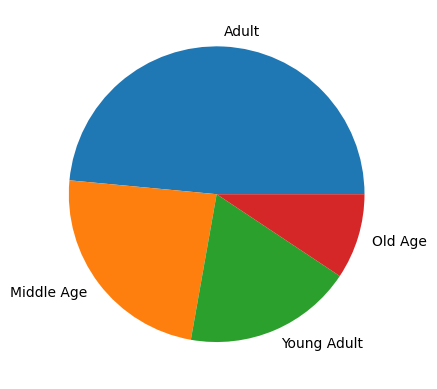

In [ ]:
plt.pie(data['Age period'].value_counts(), labels = ['Adult','Middle Age','Young Adult','Old Age'])
plt.show()

<Axes: xlabel='Age period', ylabel='count'>

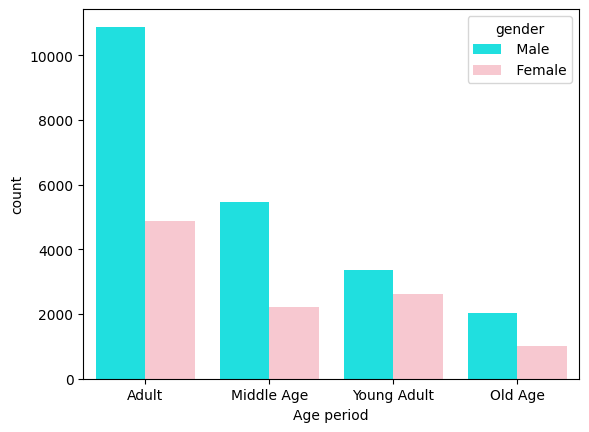

In [ ]:
sns.countplot(x="Age period", hue="gender", data=data, palette=['cyan', 'pink'])

<Axes: xlabel='Age period', ylabel='count'>

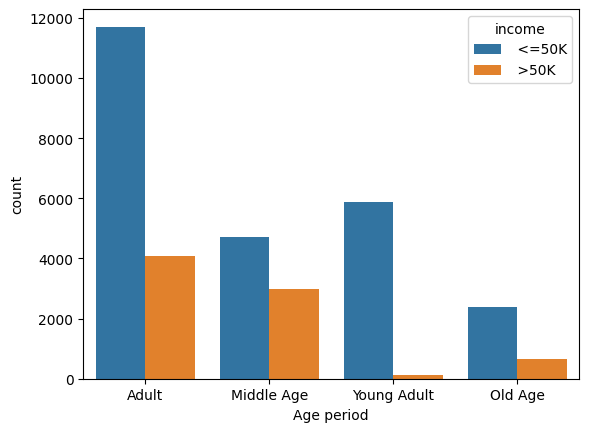

In [ ]:
sns.countplot(x="Age period", hue="income", data=data)

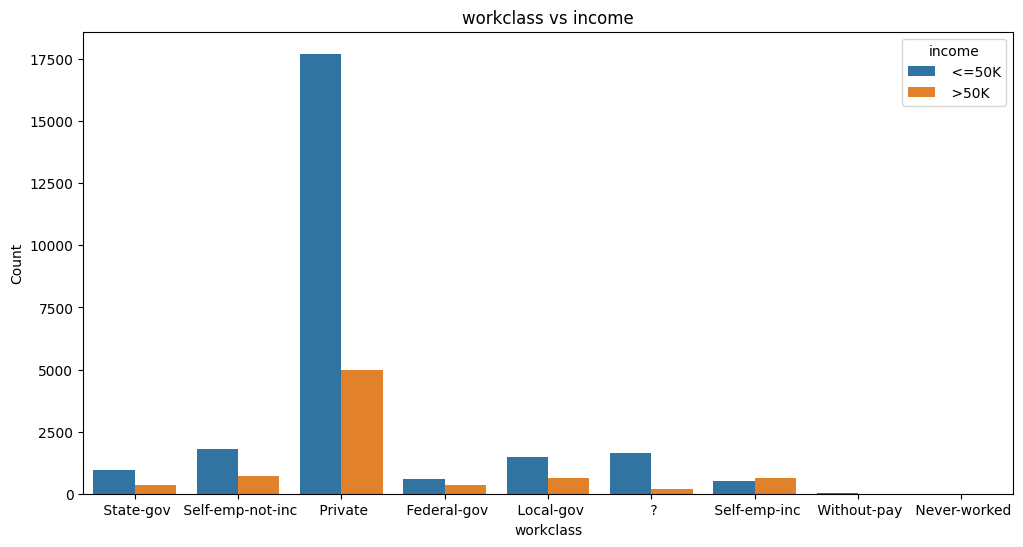

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.countplot(x='workclass', hue='income', data=data)
plt.title('workclass vs income')
plt.xlabel('workclass')
plt.ylabel('Count')
plt.show()

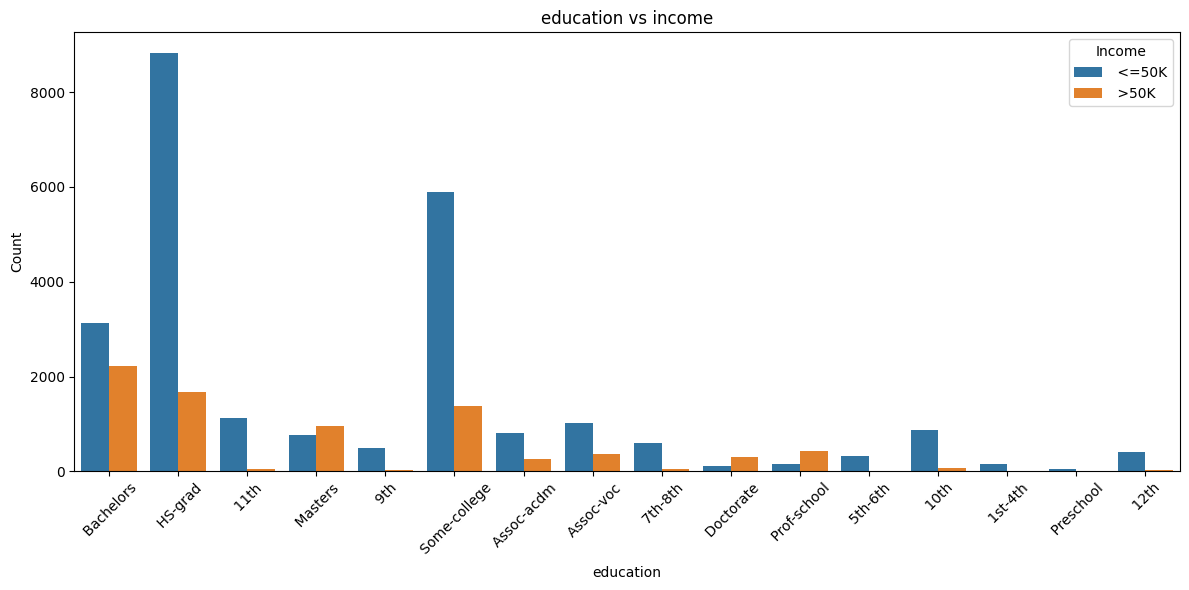

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.countplot(x='education', hue='income', data=data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('education vs income')
plt.xlabel('education')
plt.ylabel('Count')
plt.legend(title='Income', loc='upper right')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

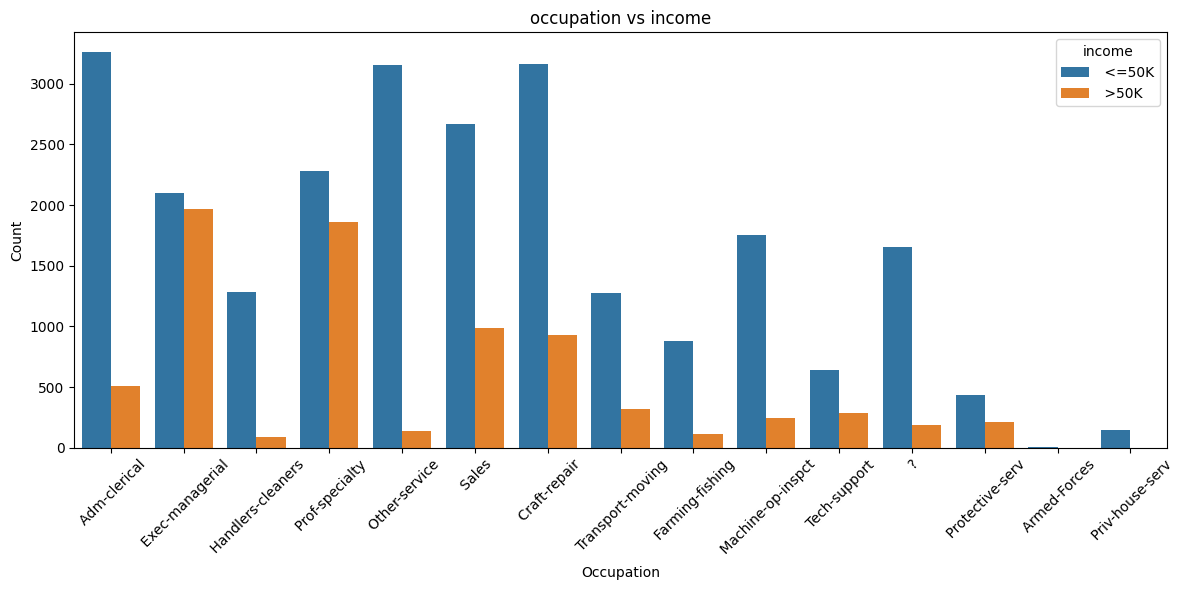

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.countplot(x='occupation', hue='income', data=data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('occupation vs income')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.tight_layout()  # Adjust layout to prevent clipping of labelsplt.show()

In [ ]:
def working_hours_period(hours_per_week):
  if hours_per_week >= 15 and hours_per_week <= 30:
    return "Low working hours"
  elif hours_per_week > 30 and hours_per_week <= 70:
    return "Medium working hours"
  elif hours_per_week > 70 and hours_per_week <= 100:
    return "High working hours"
  else:
    return "Very high working hours"

data['Working Hours Period'] = data['hours_per_week'].apply(working_hours_period)

In [ ]:
data['Working Hours Period'].value_counts()

Medium working hours       26799
Low working hours           4267
Very high working hours      973
High working hours           498
Name: Working Hours Period, dtype: int64

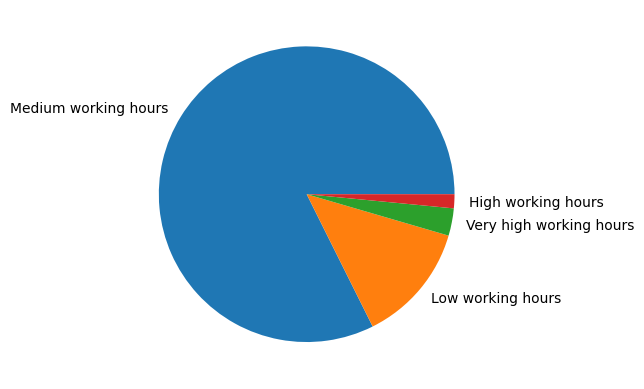

In [ ]:
plt.pie(data['Working Hours Period'].value_counts(), labels = ['Medium working hours','Low working hours','Very high working hours','High working hours'])
plt.show()

<Axes: xlabel='Age period', ylabel='count'>

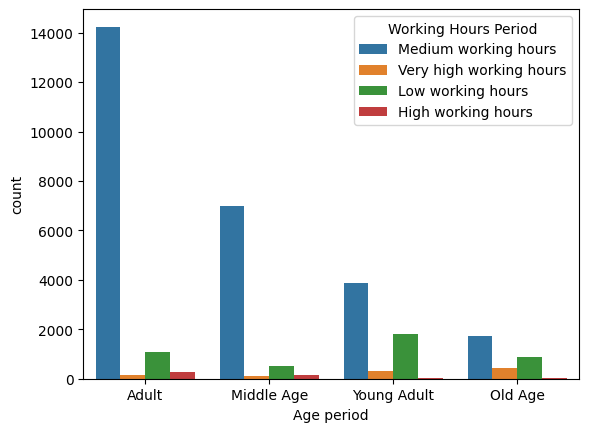

In [ ]:
sns.countplot(x="Age period", hue="Working Hours Period", data=data)

# Checking Correlation

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['workclass'] = label_encoder.fit_transform(data['workclass'])
data['education'] = label_encoder.fit_transform(data['education'])
data['martial_status'] = label_encoder.fit_transform(data['martial_status'])
data['occupation'] = label_encoder.fit_transform(data['occupation'])
data['relationship'] = label_encoder.fit_transform(data['relationship'])
data['gender'] = label_encoder.fit_transform(data['gender'])
data['race'] = label_encoder.fit_transform(data['race'])
data['country'] = label_encoder.fit_transform(data['country'])
data['income'] = label_encoder.fit_transform(data['income'])

In [ ]:
sex_percent=data['gender'].value_counts(normalize=True) * 100
print(sex_percent)

1    66.92381
0    33.07619
Name: gender, dtype: float64


In [ ]:
correlation = data.corr()
correlation

,age,workclass,fnlwgt,education,education_num,martial_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country,income
age,1.000000,0.003783,-0.076447,-0.010551,0.036224,-0.266137,-0.020911,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.001524,0.234037
workclass,0.003783,1.000000,-0.016601,0.023456,0.052169,-0.064761,0.254993,-0.090433,0.049740,0.095999,0.033852,0.012240,0.139047,-0.007677,0.051665
fnlwgt,-0.076447,-0.016601,1.000000,-0.028053,-0.043388,0.028123,0.001403,0.008868,-0.021497,0.027089,0.000429,-0.010260,-0.018898,-0.051874,-0.009502
education,-0.010551,0.023456,-0.028053,1.000000,0.359085,-0.038422,-0.021235,-0.011057,0.014303,-0.027433,0.030085,0.016793,0.055991,0.063870,0.079366
education_num,0.036224,0.052169,-0.043388,0.359085,1.000000,-0.069161,0.109753,-0.094432,0.032011,0.012205,0.122664,0.079892,0.148422,0.050136,0.335272
martial_status,-0.266137,-0.064761,0.028123,-0.038422,-0.069161,1.000000,-0.009814,0.185532,-0.067930,-0.129402,-0.043368,-0.034140,-0.190432,-0.023406,-0.199199
occupation,-0.020911,0.254993,0.001403,-0.021235,0.109753,-0.009814,1.000000,-0.075587,0.006794,0.080501,0.025506,0.017985,0.080501,-0.012406,0.075419
relationship,-0.263744,-0.090433,0.008868,-0.011057,-0.094432,0.185532,-0.075587,1.000000,-0.116051,-0.582594,-0.057947,-0.061098,-0.248875,-0.005636,-0.250948
race,0.029116,0.049740,-0.021497,0.014303,0.032011,-0.067930,0.006794,-0.116051,1.000000,0.087472,0.011154,0.018913,0.041920,0.137850,0.071847
gender,0.088708,0.095999,0.027089,-0.027433,0.012205,-0.129402,0.080501,-0.582594,0.087472,1.000000,0.048489,0.045571,0.229187,-0.008256,0.215969


<Axes: >

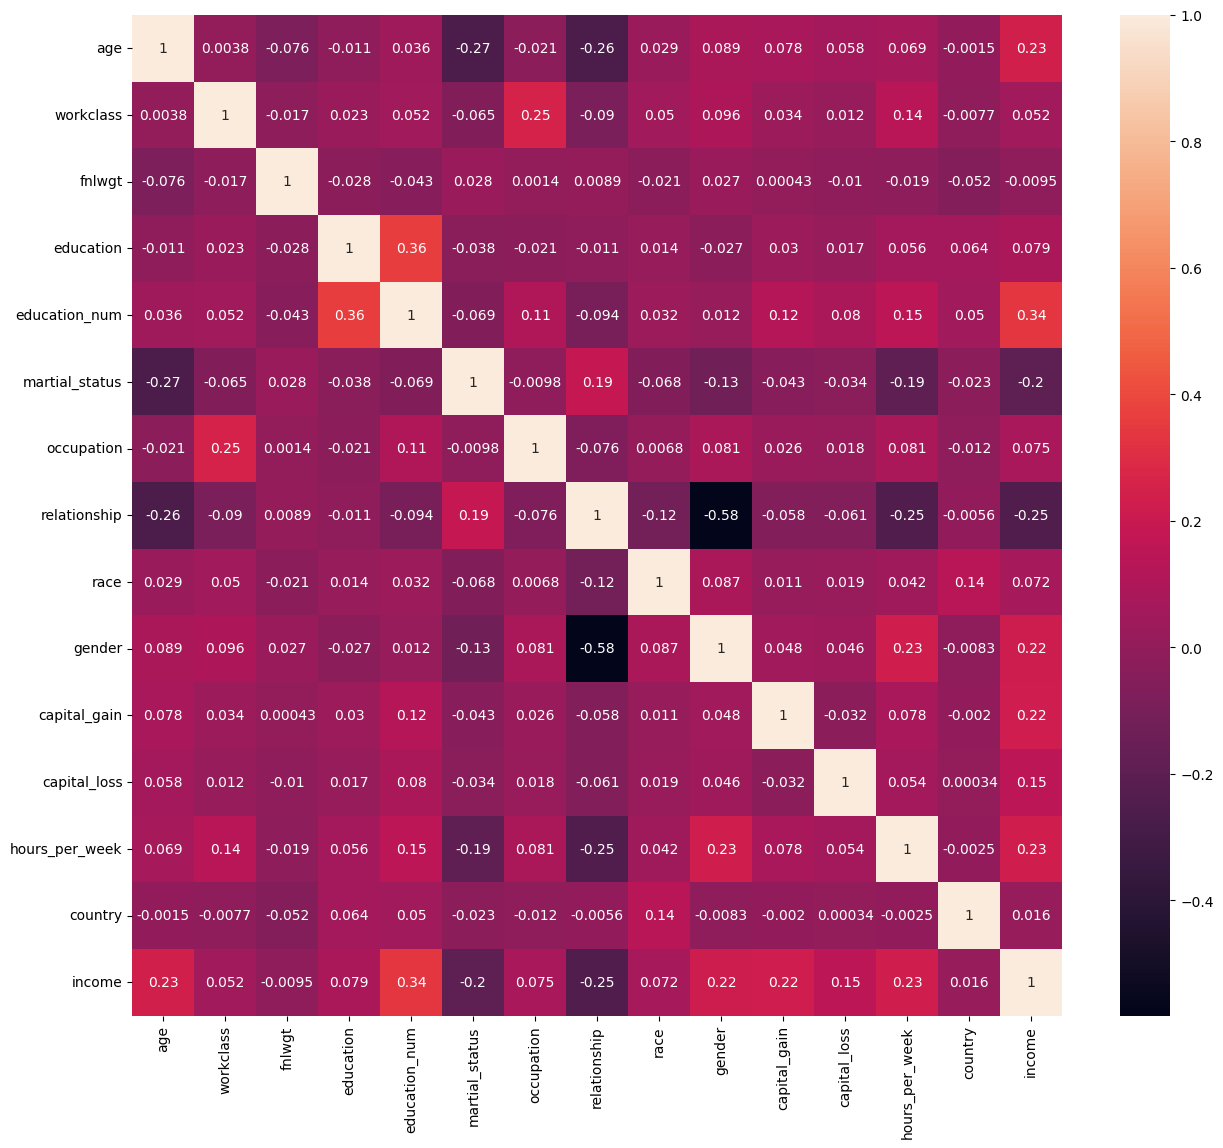

In [ ]:
plt.figure(figsize=(15, 13))
sns.heatmap(correlation, annot=True)

In [ ]:
data.drop(columns=['workclass','fnlwgt','education','martial_status','relationship','occupation','race','country','Age period','Working Hours Period'],inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32537 non-null  int64
 1   education_num   32537 non-null  int64
 2   gender          32537 non-null  int64
 3   capital_gain    32537 non-null  int64
 4   capital_loss    32537 non-null  int64
 5   hours_per_week  32537 non-null  int64
 6   income          32537 non-null  int64
dtypes: int64(7)
memory usage: 2.0 MB


# Checking For Outliers

In [ ]:
data.head()

,age,education_num,gender,capital_gain,capital_loss,hours_per_week,income
0,39,13,1,2174,0,40,0
1,50,13,1,0,0,13,0
2,38,9,1,0,0,40,0
3,53,7,1,0,0,40,0
4,28,13,0,0,0,40,0


In [ ]:
#Calculating IQR for age
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3-Q1

#Setting our upper and lower limits
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print(upper_bound)
print(lower_bound)

78.0
-2.0


In [ ]:
#Counting the outliers for age
cnt=0
for i in range(len(data)):
  if data['age'].iloc[i] > upper_bound:
          cnt+=1
  if data['age'].iloc[i] < lower_bound:
          cnt+=1
print(cnt)

142


In [ ]:
#removing outliers
data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

In [ ]:
#Calculating IQR for working hours
Q1 = data['hours_per_week'].quantile(0.25)
Q3 = data['hours_per_week'].quantile(0.75)
IQR = Q3-Q1

#Setting our upper and lower limits
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print(upper_bound)
print(lower_bound)

52.5
32.5


In [ ]:
#Counting the outliers for working hours
cnt=0
for i in range(len(data)):
  if data['hours_per_week'].iloc[i] > upper_bound:
          cnt+=1
  if data['hours_per_week'].iloc[i] < lower_bound:
          cnt+=1
print(cnt)

8913


In [ ]:
#removing outliers
data = data[(data['hours_per_week'] >= lower_bound) & (data['hours_per_week'] <= upper_bound)]

# Testing Models Accuracy

In [ ]:
X=data.drop(['income'],axis=1)
y=data['income']

In [ ]:

X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = dt_classifier.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Decision Tree classification accuracy:", accuracy)

Decision Tree classification accuracy: 0.8030657866723441


In [ ]:
clf_22 = DecisionTreeClassifier(criterion='entropy')
scores = cross_val_score(clf_22, X_train, y_train, cv=10,scoring="accuracy")
print("accuracy on validation data", scores)
print("mean", np.mean(scores))

accuracy on validation data [0.79989356 0.8153273  0.82384247 0.79510378 0.81160192 0.81256656
 0.81363152 0.81842386 0.81469649 0.82055378]
mean 0.8125641230550545


In [ ]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[3216,  252],
       [ 660,  569]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8058335107515435


In [ ]:
clf_22 = LogisticRegression(random_state = 0)
scores = cross_val_score(clf_22, X_train, y_train, cv=10,scoring="accuracy")
print("accuracy on validation data", scores)
print("mean", np.mean(scores))

accuracy on validation data [0.79244279 0.79457158 0.79670037 0.80202235 0.79616817 0.81842386
 0.79978701 0.79925453 0.80617678 0.7971246 ]
mean 0.8002672041922917


In [ ]:

# Create a Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Make predictions on the test set
predictions = nb.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Naive Bayes classification accuracy:", accuracy)


Naive Bayes classification accuracy: 0.7773046625505642


In [ ]:
clf_22 = GaussianNB()
scores = cross_val_score(clf_22, X_train, y_train, cv=10,scoring="accuracy")
print("accuracy on validation data", scores)
print("mean", np.mean(scores))

accuracy on validation data [0.77115487 0.76742948 0.7887174  0.79191059 0.78286323 0.77795527
 0.78328009 0.78381257 0.78700745 0.78115016]
mean 0.7815281109919003


# Deployment


In [ ]:
import joblib

joblib_file = "salary_classifier_model"
joblib.dump(classifier, joblib_file)
loaded_model = joblib.load(open(joblib_file, 'rb'))

pred_Y = loaded_model.predict(X_test)
result = np.round(accuracy_score(y_test, predictions) ,2)
print(result)

0.78
